In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

canadian_births_df = pd.read_csv('data/canada_births_1991_2022.csv')
players_df = pd.read_csv('data/nhl_player_births.csv')
rosters_df = pd.read_csv('data/nhl_rosters.csv')
teams_df = pd.read_csv('data/nhl_teams.csv')


We will first explore the distribution of Canadian's birth by month of the year to set the baseline. The population data we use is the Canadian births from 1991 to 2022.

In [48]:
pivot_table = pd.pivot_table(canadian_births_df, values='births', index='month', aggfunc='sum')
column_totals = pivot_table.sum(axis=0)
percent_pivot = (pivot_table.div(column_totals, axis=1) * 100).round(1)
percent_pivot.rename(columns={'births': '% of Canadian births 1991-2022'}, inplace=True)
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
percent_pivot.index = percent_pivot.index.map(month_names)
percent_pivot

,% of Canadian births 1991-2022
month,
January,8.0
February,7.5
March,8.5
April,8.4
May,8.8
June,8.5
July,8.9
August,8.7
September,8.7


We can see the general Canadian population birth for each month ranges from 7.5% to 8.9%

Now let's look at the NHL players birth by month of year for the same period (birth year after 1991).

In [39]:
rosters_df['birth_date'] = pd.to_datetime(rosters_df['birth_date'])
rosters_df['birth_date'] = pd.to_datetime(rosters_df['birth_date'], errors='coerce')
# create column for birth_month
rosters_df['birth_month'] = rosters_df['birth_date'].dt.month
# create column for birth_year
rosters_df['birth_year'] = rosters_df['birth_date'].dt.year

# filter for only Canadian births
filtered_df = rosters_df[rosters_df['birth_country'] == 'CAN']
# filter for birth year after 1991
filtered_df = rosters_df[rosters_df['birth_year'] >1991]
# calculate % of NHL birth by month of year
monthly_counts = rosters_df.groupby('birth_month')['player_id'].count()
total_players = monthly_counts.sum()
monthly_percentage = (monthly_counts / total_players * 100).round(1)
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
monthly_percentage.index = monthly_percentage.index.map(month_names)

# Reorder the table by calendar month order
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
result_table = monthly_percentage.to_frame(name="% of NHL births")
result_table


,% of NHL births
birth_month,
January,10.2
February,9.7
March,9.6
April,9.1
May,9.0
June,8.5
July,8.3
August,7.0
September,7.4


Now let's compare the two

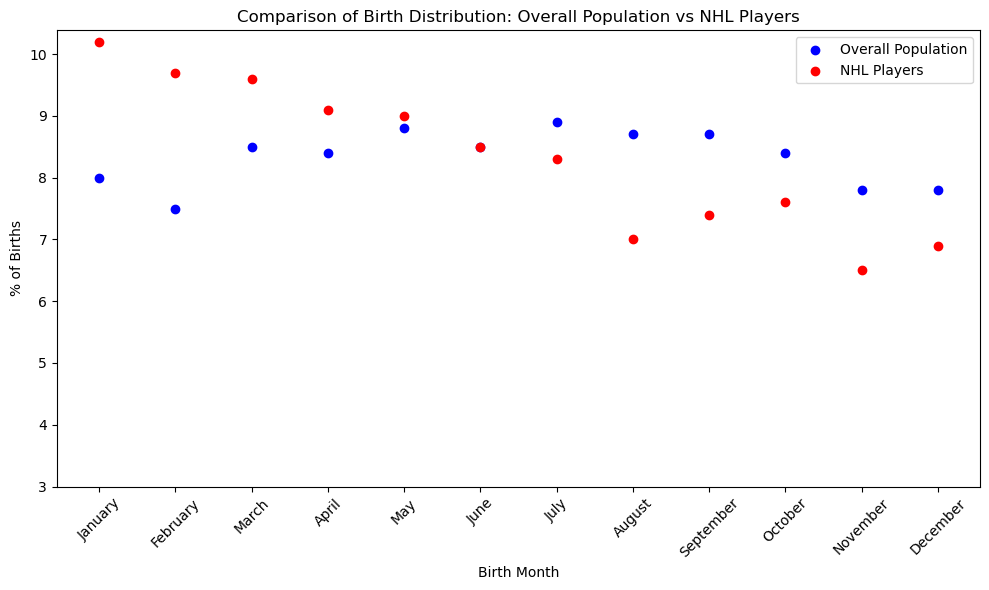

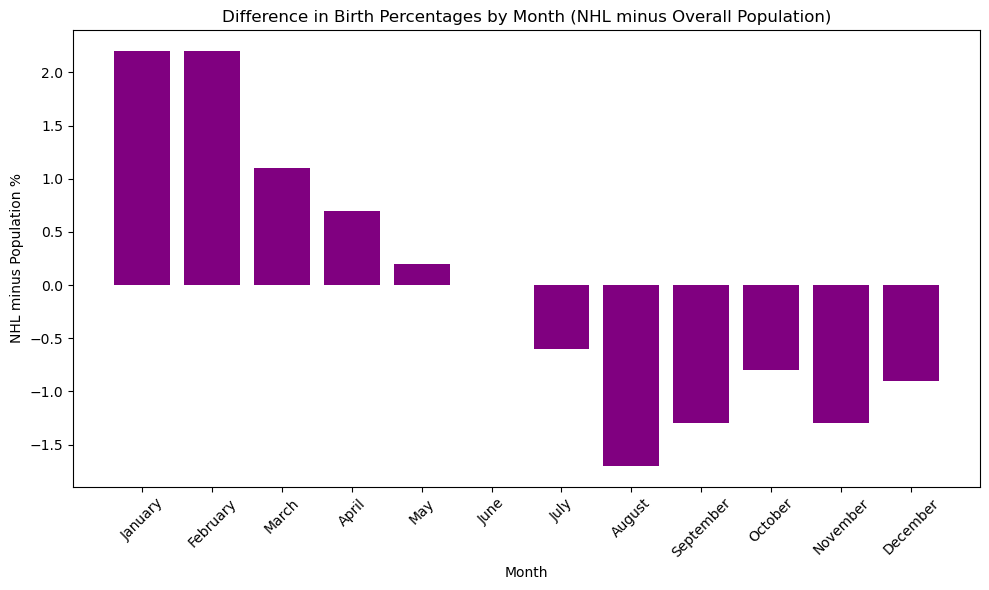

In [49]:
### plot the birth distribution of NHL and overall population##

x = np.arange(len(ordered_months))

plt.figure(figsize=(10, 6))

# Plot the overall population data as blue dots.
plt.scatter(x, percent_pivot, label='Overall Population', color='blue', zorder=3)

# Plot the NHL players data as red dots.
plt.scatter(x, result_table, label='NHL Players', color='red', zorder=3)


# Customize the x-axis with month names.

plt.xticks(x, ordered_months, rotation=45)
plt.xlabel('Birth Month')
plt.ylabel('% of Births')
plt.title('Comparison of Birth Distribution: Overall Population vs NHL Players')
plt.ylim(bottom=3.0)
plt.legend()
plt.tight_layout()
plt.show()


### create table that shows the delta between NHL players vs. overall population###
# Create a new column with the difference: NHL % minus overall population %
merged_df["NHL minus population"] = merged_df["% of NHL births"] - merged_df["% of Canadian births 1991-2022"]

# (Optional) Reorder the rows to follow calendar month order if necessary
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
merged_df = merged_df.reindex(ordered_months)

# Display table
plt.figure(figsize=(10, 6))

# Create a bar chart for the difference in percentage
plt.bar(merged_df.index, merged_df["NHL minus population"], color='purple')

# Labeling the axes and title
plt.xlabel('Month')
plt.ylabel('NHL minus Population %')
plt.title('Difference in Birth Percentages by Month (NHL minus Overall Population)')

# Rotate month labels on the x-axis for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()





We can see that NHL player birth month distribution is indeed different than the overall Canadian population. Specifically, the earlier month in the year (Jan- Mar) have higher concentration of NHL players while later in the year (Aug-Dec) have significantly less NHL players when compare to overall population. This validates the hypothesis of those who are born earlier in the year have an advantage of becoming professionaly Hockey players. Next we will explore if this trend has changed overtime.

In [47]:
### extend NHL table to start from 1960 ###

rosters_df['birth_date'] = pd.to_datetime(rosters_df['birth_date'])
rosters_df['birth_date'] = pd.to_datetime(rosters_df['birth_date'], errors='coerce')
# create column for birth_month
rosters_df['birth_month'] = rosters_df['birth_date'].dt.month
# create column for birth_year
rosters_df['birth_year'] = rosters_df['birth_date'].dt.year

# filter for only Canadian births
filtered_df = rosters_df[rosters_df['birth_country'] == 'CAN']
# filter for birth year after 1991
filtered_df = rosters_df[rosters_df['birth_year'] >1960]


# Define bins for every 2 decades. Adjust the upper bin if needed.
filtered_df = rosters_df[(rosters_df['birth_country'] == 'CAN') & (rosters_df['birth_year'] > 1960)].copy()
bins = [1960, 1980, 2000, 2020, 2040]
labels = ['1961-1980', '1981-2000', '2001-2020', '2021-2040']

# Create a new column 'group_birth_year' that buckets birth_year into these intervals.
filtered_df['group_birth_year'] = pd.cut(filtered_df['birth_year'], bins=bins, labels=labels, right=True)


# Values: Count of player_id
pivot_table = pd.pivot_table(filtered_df, 
                             values='player_id', 
                             index='birth_month', 
                             columns='group_birth_year', 
                             aggfunc='count', 
                             fill_value=0)

# Convert the counts in each column to percentage of that column.
column_totals = pivot_table.sum(axis=0)
percent_pivot = pivot_table.div(column_totals, axis=1) * 100

# Round to one decimal place.
percent_pivot = percent_pivot.round(1)

# Map numeric month to month names.
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 
    5: "May", 6: "June", 7: "July", 8: "August", 
    9: "September", 10: "October", 11: "November", 12: "December"
}
percent_pivot.index = percent_pivot.index.map(month_names)

# (Optional) Ensure the rows are ordered by the calendar months.
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
percent_pivot = percent_pivot.reindex(ordered_months)

# --- Filter to display only the two desired columns ---
selected_columns = ['1961-1980', '1981-2000']
percent_pivot_filtered = percent_pivot[selected_columns]

# Display the resulting pivot table.
print(percent_pivot_filtered)


group_birth_year  1961-1980  1981-2000
birth_month                           
January                10.1        9.2
February               10.5        9.7
March                   8.3        9.9
April                  10.1       10.1
May                    10.6       10.7
June                    9.8        9.8
July                    7.4        7.8
August                  7.8        7.6
September               7.0        6.7
October                 7.2        6.4
November                5.7        5.4
December                5.7        6.8


/var/folders/sv/60ztb81j3zl4zn661mj7lf5r0000gp/T/ipykernel_39178/2570537154.py:26: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(filtered_df,


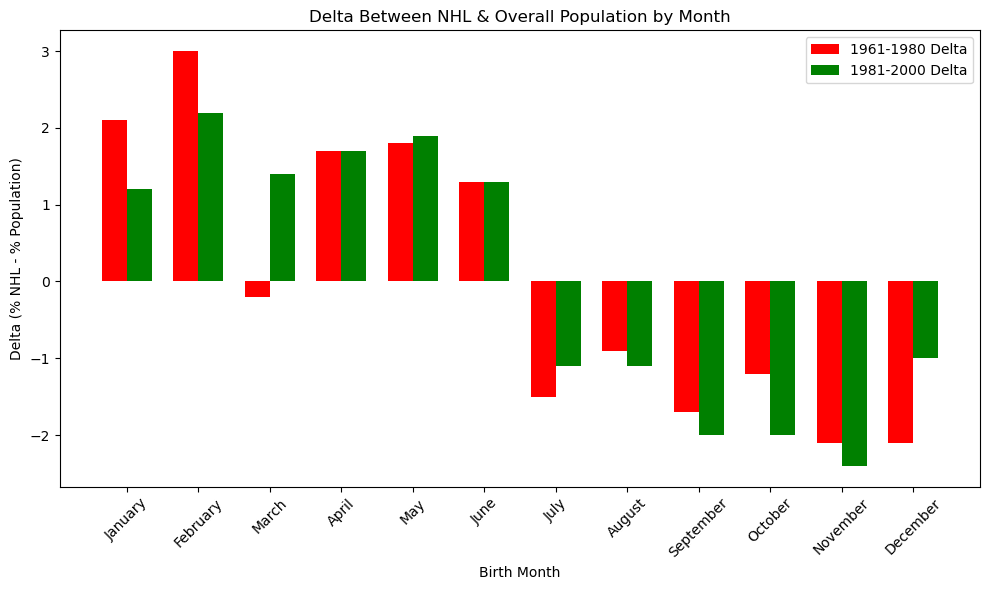

In [52]:
# overall_pop is extracted from percent_pivot:
overall_pop = percent_pivot["% of Canadian births 1991-2022"]
# nhl_groups is percent_pivot_filtered with columns "1961-1980" and "1981-2000":
nhl_groups = percent_pivot_filtered

# Define the ordered list of month names.
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Ensure the indices are in calendar order.
overall_pop = overall_pop.reindex(ordered_months)
nhl_groups = nhl_groups.reindex(ordered_months)

# Merge the overall population and NHL groups data into one DataFrame.
merged_df = pd.concat([overall_pop, nhl_groups], axis=1)
# The merged_df now has the following columns:
#   "% of Canadian births 1991-2022", "1961-1980", "1981-2000"

# Compute the delta (difference) for each NHL bucket compared to the overall population.
merged_df["1961-1980 delta"] = merged_df["1961-1980"] - merged_df["% of Canadian births 1991-2022"]
merged_df["1981-2000 delta"] = merged_df["1981-2000"] - merged_df["% of Canadian births 1991-2022"]

# --- Create a grouped bar chart with 2 bars per month ---

# Create numeric x positions for each month.
x = np.arange(len(ordered_months))
width = 0.35  # width of each bar

plt.figure(figsize=(10, 6))

# Plot the delta for 1961-1980 as red bars (shifted to the left)
bars1 = plt.bar(x - width/2, merged_df["1961-1980 delta"], width,
                label="1961-1980 Delta", color="red")

# Plot the delta for 1981-2000 as green bars (shifted to the right)
bars2 = plt.bar(x + width/2, merged_df["1981-2000 delta"], width,
                label="1981-2000 Delta", color="green")

# Customize the chart.
plt.xlabel("Birth Month")
plt.ylabel("Delta (% NHL - % Population)")
plt.title("Delta Between NHL & Overall Population by Month")
plt.xticks(x, ordered_months, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

One may speculate that there might be some other factors that influence on why earlier birth months have higher chance to making it to the NHL, such as different physical attributes. Let's explore that.

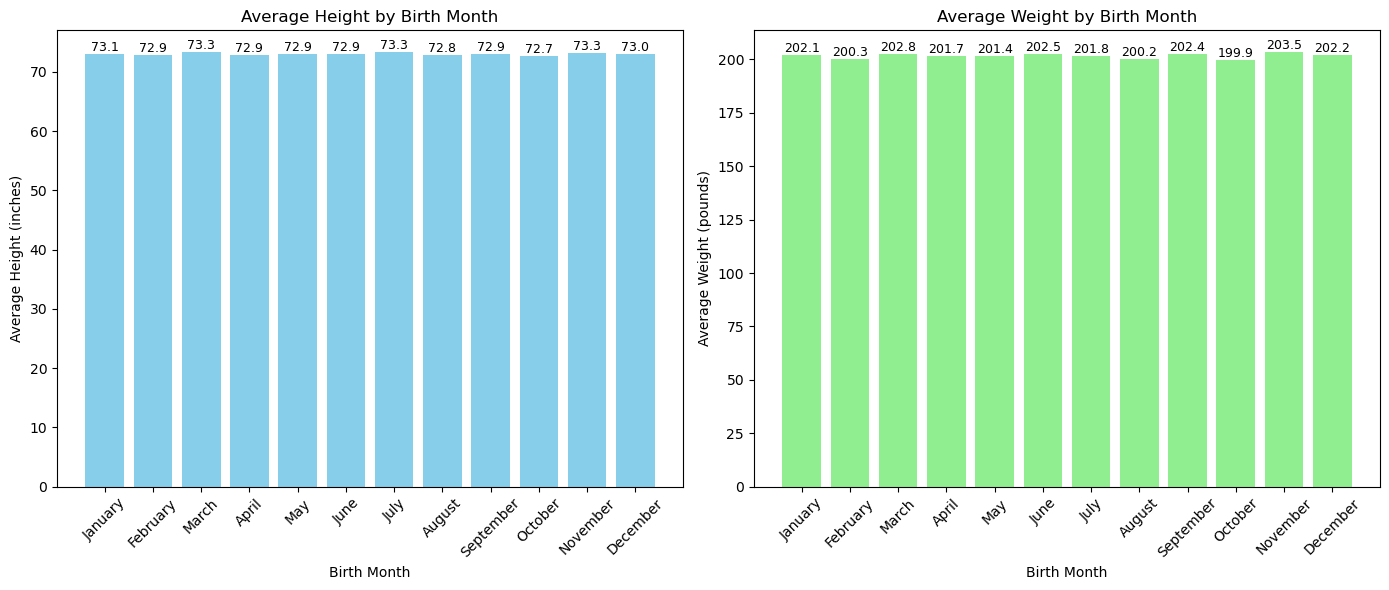

In [55]:
avg_height = filtered_df.groupby('birth_month')['height_in_inches'].mean()
avg_weight = filtered_df.groupby('birth_month')['weight_in_pounds'].mean()

# Map numeric month values to month names.
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
avg_height.index = avg_height.index.map(month_names)
avg_weight.index = avg_weight.index.map(month_names)

# Reorder both Series by the calendar month order.
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
avg_height = avg_height.reindex(ordered_months)
avg_weight = avg_weight.reindex(ordered_months)

# --- Create 2 subplots side by side ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for Average Height by Birth Month.
bars0 = axs[0].bar(avg_height.index, avg_height, color='skyblue')
axs[0].set_xlabel("Birth Month")
axs[0].set_ylabel("Average Height (inches)")
axs[0].set_title("Average Height by Birth Month")
axs[0].tick_params(axis='x', rotation=45)
# Annotate each bar with its value.
for bar in bars0:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Bar chart for Average Weight by Birth Month.
bars1 = axs[1].bar(avg_weight.index, avg_weight, color='lightgreen')
axs[1].set_xlabel("Birth Month")
axs[1].set_ylabel("Average Weight (pounds)")
axs[1].set_title("Average Weight by Birth Month")
axs[1].tick_params(axis='x', rotation=45)
# Annotate each bar with its value.
for bar in bars1:
    weight = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, weight,
                f'{weight:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()